This is the third notebook for this course. The question for this secion asked if any association could be made between the target identified in section one (heating and hot water issues) and the location identified in section 2 (the Bronx). This notebook contains all of the dataset cleaning necessary to have an dataframe ready to answer the question and to move into classification in the fourth notebook. 

In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
#from project_lib import Project
#project = Project(project_id='58548218-d78e-4251-95d2-67ed44feff5d', project_access_token='p-17588375ba270ce7d8e2f7d2651fde17fb64de66')
#pc = project.project_context


In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import types
import pandas as pd
#from botocore.client import Config
#import ibm_boto3

#def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
#client_2e2f0b3c376d4e9586d0fa475f0d4cf6 = ibm_boto3.client(service_name='s3',
    #ibm_api_key_id='ODq1RiDzqvK_ZHr2wJ_StMrShRahDkxYnRtHr-0ER_Th',
    #ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    #config=Config(signature_version='oauth'),
    #endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

#body = client_2e2f0b3c376d4e9586d0fa475f0d4cf6.get_object(Bucket='edx1-donotdelete-pr-88qux6w8ehqfye',Key='311_Service_Requests_from_2010_to_Present.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
#if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

#df_data_1 = pd.read_csv(body, low_memory=True)
df_data_1 = pd.read_csv('desktop/edx IBM/311_Service_Requests_from_2010_to_Present-2.csv', parse_dates=True)
df_data_1.head()


/Users/sarasharick/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (11,12,13,14,17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,16130303,03/03/2010 12:00:00 AM,03/03/2010 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,ELECTRIC,ELECTRIC-SUPPLY,RESIDENTIAL BUILDING,11423.0,100-45 205 PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.711566,-73.753954,"(40.71156609961959, -73.75395368561732)"
1,16130304,03/03/2010 12:00:00 AM,03/08/2010 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11423.0,100-45 205 PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.711566,-73.753954,"(40.71156609961959, -73.75395368561732)"
2,16198740,03/12/2010 12:00:00 AM,03/16/2010 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11423.0,100-32 197 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.709629,-73.762026,"(40.70962879197579, -73.76202605890995)"
3,16355766,04/01/2010 12:00:00 AM,04/29/2010 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,PLUMBING,WATER-SUPPLY,RESIDENTIAL BUILDING,11423.0,100-02 205 PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.711577,-73.753979,"(40.71157713258936, -73.75397889453976)"
4,16356909,04/01/2010 12:00:00 AM,04/29/2010 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,PLUMBING,WATER-SUPPLY,RESIDENTIAL BUILDING,11423.0,100-02 205 PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.711577,-73.753979,"(40.71157713258936, -73.75397889453976)"


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_data_1.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In order to prepare the dataframe for analysis on just the Bronx, the following cells have a similar breakdown and concatenation of the complaint data set and the PLUTO data set to ensure all incidents that occured in the Bronx are captured.

In [5]:
df_complaint = df_data_1[['Unique Key', 'Created Date', 'Closed Date', 'Complaint Type', 'Descriptor', 'Location Type', 'Incident Address', 'Incident Zip', 'City', 'Borough',
                         'Status', 'Resolution Description']]

In [6]:
df_complaint['Borough'].value_counts()

BROOKLYN         1698061
BRONX            1571109
MANHATTAN        1024221
Unspecified       873227
QUEENS            626530
STATEN ISLAND      85928
Name: Borough, dtype: int64

In [7]:
#Where Borough is properly labeled as the Bronx
bx_complaint = df_complaint[df_complaint.Borough=='BRONX']

In [8]:
bx_complaint.head()

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Address,Incident Zip,City,Borough,Status,Resolution Description
198664,18801780,09/30/2010 12:00:00 AM,NaN,APPLIANCE,ELECTRIC/GAS-RANGE,RESIDENTIAL BUILDING,2351 LORILLARD PLACE,10458.0,BRONX,BRONX,Open,The following complaint conditions are still o...
201821,19989051,03/08/2011 12:00:00 AM,03/10/2011 12:00:00 AM,PLUMBING,WATER-LEAKS,RESIDENTIAL BUILDING,2410 WASHINGTON AVENUE,10458.0,BRONX,BRONX,Closed,The Department of Housing Preservation and Dev...
201887,20006996,03/10/2011 12:00:00 AM,03/14/2011 12:00:00 AM,HEATING,HEAT,RESIDENTIAL BUILDING,518 EAST 187 STREET,10458.0,BRONX,BRONX,Closed,The Department of Housing Preservation and Dev...
201889,20007021,03/10/2011 12:00:00 AM,03/15/2011 12:00:00 AM,HEATING,HEAT,RESIDENTIAL BUILDING,530 EAST 169 STREET,10456.0,BRONX,BRONX,Closed,The Department of Housing Preservation and Dev...
201892,20007139,03/10/2011 12:00:00 AM,03/14/2011 12:00:00 AM,HEATING,HEAT,RESIDENTIAL BUILDING,518 EAST 187 STREET,10458.0,BRONX,BRONX,Closed,More than one complaint was received for this ...


In [9]:
#Where Borough is unspecified but contains incidents from the Bronx
Unspecified = df_complaint[df_complaint.Borough=='Unspecified']
Unspecified.head()

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Address,Incident Zip,City,Borough,Status,Resolution Description
0,16130303,03/03/2010 12:00:00 AM,03/03/2010 12:00:00 AM,ELECTRIC,ELECTRIC-SUPPLY,RESIDENTIAL BUILDING,100-45 205 PLACE,11423.0,HOLLIS,Unspecified,Closed,The Department of Housing Preservation and Dev...
1,16130304,03/03/2010 12:00:00 AM,03/08/2010 12:00:00 AM,HEATING,HEAT,RESIDENTIAL BUILDING,100-45 205 PLACE,11423.0,HOLLIS,Unspecified,Closed,The Department of Housing Preservation and Dev...
2,16198740,03/12/2010 12:00:00 AM,03/16/2010 12:00:00 AM,HEATING,HEAT,RESIDENTIAL BUILDING,100-32 197 STREET,11423.0,HOLLIS,Unspecified,Closed,The Department of Housing Preservation and Dev...
3,16355766,04/01/2010 12:00:00 AM,04/29/2010 12:00:00 AM,PLUMBING,WATER-SUPPLY,RESIDENTIAL BUILDING,100-02 205 PLACE,11423.0,HOLLIS,Unspecified,Closed,The Department of Housing Preservation and Dev...
4,16356909,04/01/2010 12:00:00 AM,04/29/2010 12:00:00 AM,PLUMBING,WATER-SUPPLY,RESIDENTIAL BUILDING,100-02 205 PLACE,11423.0,HOLLIS,Unspecified,Closed,The Department of Housing Preservation and Dev...


In [10]:
#May contain incidents from the Bronx
Unspecified['City'].isnull().sum()

53405

In [11]:
#City is same as Borough for four of the five boroughs
Unspecified['City'].value_counts()

BROOKLYN               295363
BRONX                  250668
NEW YORK               155072
JAMAICA                 15511
STATEN ISLAND           14366
FLUSHING                 7948
ASTORIA                  7941
RIDGEWOOD                7164
FAR ROCKAWAY             6401
ELMHURST                 4839
WOODSIDE                 4373
CORONA                   4323
JACKSON HEIGHTS          4056
FOREST HILLS             2994
SOUTH RICHMOND HILL      2651
SUNNYSIDE                2411
RICHMOND HILL            2358
HOLLIS                   2322
QUEENS VILLAGE           2314
REGO PARK                2277
EAST ELMHURST            2276
OZONE PARK               2079
WOODHAVEN                2024
SAINT ALBANS             1958
ARVERNE                  1880
SOUTH OZONE PARK         1862
SPRINGFIELD GARDENS      1857
KEW GARDENS              1455
LONG ISLAND CITY         1206
ROSEDALE                 1079
ROCKAWAY PARK            1047
MASPETH                   967
BAYSIDE                   700
OAKLAND GA

In [12]:
unspecified_bx = Unspecified[Unspecified.City=='BRONX']
unspecified_bx.head()

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Address,Incident Zip,City,Borough,Status,Resolution Description
195166,19816426,02/11/2011 12:00:00 AM,02/14/2011 12:00:00 AM,PLUMBING,WATER-SUPPLY,RESIDENTIAL BUILDING,530 EAST 169 STREET,10456.0,BRONX,Unspecified,Closed,The Department of Housing Preservation and Dev...
195167,19800216,02/09/2011 12:00:00 AM,02/14/2011 12:00:00 AM,HEATING,HEAT,RESIDENTIAL BUILDING,530 EAST 169 STREET,10456.0,BRONX,Unspecified,Closed,More than one complaint was received for this ...
195180,15635450,01/01/2010 12:00:00 AM,01/08/2010 12:00:00 AM,NONCONST,VERMIN,RESIDENTIAL BUILDING,2356 LORILLARD PLACE,10458.0,BRONX,Unspecified,Closed,The Department of Housing Preservation and Dev...
195182,15635729,01/01/2010 12:00:00 AM,01/08/2010 12:00:00 AM,NONCONST,RUBBISH,RESIDENTIAL BUILDING,2356 LORILLARD PLACE,10458.0,BRONX,Unspecified,Closed,The Department of Housing Preservation and Dev...
195185,15636224,01/01/2010 12:00:00 AM,01/08/2010 12:00:00 AM,NONCONST,VERMIN,RESIDENTIAL BUILDING,2356 LORILLARD PLACE,10458.0,BRONX,Unspecified,Closed,The Department of Housing Preservation and Dev...


In [13]:
#Where both Borough and City are unlisted
remain_unspecified = Unspecified[Unspecified['City'].isnull()]
remain_unspecified.head()

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Address,Incident Zip,City,Borough,Status,Resolution Description
3246754,19682256,01/25/2011 12:00:00 AM,01/30/2011 12:00:00 AM,HEATING,HEAT,RESIDENTIAL BUILDING,102-23 HARACE HARDING EXPRESSWAY,NaN,NaN,Unspecified,Closed,The Department of Housing Preservation and Dev...
3246911,19023113,11/01/2010 12:00:00 AM,11/12/2010 12:00:00 AM,HEATING,HEAT,RESIDENTIAL BUILDING,146-26 BURLING STREET,NaN,NaN,Unspecified,Closed,The Department of Housing Preservation and Dev...
3249068,43950950,10/02/2019 06:09:24 AM,10/17/2019 08:57:30 AM,ELECTRIC,POWER OUTAGE,RESIDENTIAL BUILDING,147 SCRIBNER LANE,NaN,NaN,Unspecified,Closed,The Department of Housing Preservation and Dev...
3249669,42022233,03/22/2019 06:01:13 PM,03/25/2019 02:41:23 PM,HPD Literature Request,Housing Information Guide For Tenants and Owne...,NaN,NaN,NaN,NaN,Unspecified,Closed,The literature has been mailed. If it has not ...
3249670,42022326,03/22/2019 02:58:35 PM,03/25/2019 02:41:23 PM,HPD Literature Request,Home Ownership Kit,NaN,NaN,NaN,NaN,Unspecified,Closed,The literature has been mailed. If it has not ...


In [14]:
remain_unspecified['Incident Zip'].isnull().sum()

53405

In [15]:
#Any remaining Bronx incidents cannot be determined by zipcode
remain_unspecified['Incident Zip'].value_counts()

Series([], Name: Incident Zip, dtype: int64)

In [16]:
remain_unspecified['Incident Address'].isnull().sum()

52830

In [17]:
#Remaining Bronx incidents will have to be determined by incident address
remain_unspecified['Incident Address'].value_counts()

190 BEACH 106 LANE                    51
75-10 GRAND CENTRAL PARKWAY NORTH     33
4-37 BEACH 63 STREET                  30
3-19 BEACH 73 STREET                  24
2980 28 ST                            17
22-00 BEACH 22 STREET                 15
4-69 BEACH 63 STREET                  14
151 BEACH 81 PLACE                    13
10-08 BEACH 30 STREET                 13
102-23 HARACE HARDING EXPRESSWAY      11
504 GRAND STREET                      11
67-45 67 DRIVE                        11
3-27 BEACH 84 STREET                  10
150 BEACH 86 PLACE                    10
238-11 HILLSIDE AVENUE                 9
160-17 GRAND CENTRAL PARKWAY NORTH     8
18-12 CENTER STREET                    7
1-27 BEACH 84 STREET                   7
18-22 CENTER STREET                    6
10-01 BEACH 30 STREET                  6
975 SHERMAN AVE                        6
4-31 BEACH 63 STREET                   6
25 HILLSIDE AVENUE                     5
813 FEILDS STREET                      5
159-09 GRAND CEN

In [18]:

#body = client_2e2f0b3c376d4e9586d0fa475f0d4cf6.get_object(Bucket='edx1-donotdelete-pr-88qux6w8ehqfye',Key='pluto_19v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
#if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

#df_data_2 = pd.read_csv(body, low_memory=True)
df_data_2 = pd.read_csv('desktop/edx IBM/pluto_19v1.csv')
df_data_2.head()


/Users/sarasharick/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (16,17,18,20,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate,geom
0,MN,1103,36,104.0,135.0,1003.0,2.0,6.0,10019.0,E040,18.0,4500.0,1.0,3B,801 11 AVENUE,M2-3,NaN,NaN,NaN,NaN,NaN,CL,NaN,NaN,NaN,N,G8,5.0,0.0,NaN,"801 11TH AVE.,",26817.0,57805.0,57805.0,0.0,0.0,12000.0,30737.0,0.0,0.0,15068.0,2.0,2.0,3.0,0.0,3.0,201.00,150.00,75.0,125.0,N,3.0,Y,3.0,2.0,2313900.0,4700700.0,0.0,1920.0,2006.0,2011.0,NaN,NaN,2.16,0.0,2.0,0.0,1,1011030036,NaN,135.0,986332.0,219627.0,8c,NaN,106W002,10405.0,NaN,NaN,NaN,1,19v1,4.0,15.0,NaN,NaN,07/06/2019,11/15/2018,07/29/2019,07/05/2019,07/26/2019,NaN,NaN,05/31/2019,0106000020E61000000100000001030000000100000007...
1,MN,1109,100,104.0,135.0,1000.0,2.0,3.0,10019.0,E040,18.0,4500.0,1.0,3B,PIER,M2-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,T9,7.0,0.0,X,NYS DEPT OF ENVIR CONSV,172842.0,105562.0,105562.0,0.0,0.0,0.0,0.0,0.0,0.0,105562.0,2.0,1.0,0.0,0.0,1.0,724.00,266.75,0.0,0.0,N,0.0,Y,2.0,0.0,16200000.0,34528500.0,34528500.0,2002.0,0.0,0.0,NaN,NaN,0.61,0.0,2.0,0.0,1,1011090100,NaN,135.0,985279.0,219475.0,8c,NaN,106W073,10405.0,NaN,1.011100e+09,05/23/2011,1,19v1,4.0,15.0,1.0,1.0,07/06/2019,11/15/2018,07/29/2019,07/05/2019,07/26/2019,NaN,NaN,05/31/2019,0106000020E6100000010000000103000000010000000A...
2,MN,1121,29,107.0,153.0,6000.0,3.0,6.0,10023.0,L035,20.0,4000.0,1.0,1A,80 CENTRAL PARK WEST,R10A,R8B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,D4,3.0,0.0,NaN,80 CPW APT CORP,15002.0,225552.0,31500.0,194052.0,7000.0,0.0,24500.0,0.0,0.0,0.0,2.0,1.0,24.0,165.0,168.0,75.42,174.29,75.0,172.0,N,3.0,Y,3.0,2.0,6001650.0,26984250.0,399257.0,1968.0,0.0,0.0,Upper West Side / Central Park West Historic D...,NaN,15.03,10.0,0.0,10.0,1,1011210029,NaN,153.0,990305.0,221271.0,8c,NaN,106W026,10406.0,NaN,NaN,NaN,1,19v1,7.0,15.0,NaN,NaN,07/06/2019,11/15/2018,07/29/2019,07/05/2019,07/26/2019,NaN,NaN,05/31/2019,0106000020E61000000100000001030000000100000009...
3,MN,1099,12,104.0,135.0,2005.0,2.0,3.0,10019.0,E040,18.0,4500.0,1.0,3B,631 WEST 51 STREET,M2-4,NaN,NaN,NaN,NaN,NaN,CL,NaN,NaN,NaN,N,E7,6.0,0.0,NaN,630 WEST 52ND LLC,9050.0,36184.0,36184.0,0.0,0.0,0.0,0.0,36184.0,0.0,0.0,2.0,1.0,4.0,0.0,2.0,40.00,200.83,40.0,200.0,N,3.0,Y,4.0,1.0,794250.0,3680550.0,0.0,1946.0,0.0,2016.0,NaN,NaN,4.00,0.0,5.0,0.0,1,1010990012,NaN,135.0,985450.0,218920.0,8c,NaN,105N050,10405.0,NaN,NaN,NaN,1,19v1,4.0,15.0,NaN,NaN,07/06/2019,11/15/2018,07/29/2019,07/05/2019,07/26/2019,NaN,NaN,05/31/2019,0106000020E61000000100000001030000000100000009...
4,BK,5751,49,310.0,212.0,3002.0,20.0,38.0,11219.0,E284,68.0,8020.0,3.0,4C,1073 66 STREET,R6B,NaN,NaN,NaN,C1-3,NaN,NaN,NaN,NaN,NaN,N,C0,2.0,0.0,NaN,"CHEN, QI BIN",2000.0,3600.0,0.0,2400.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,3.0,3.0,20.00,100.00,20.0,57.0,N,2.0,N,5.0,1.0,23580.0,84960.0,0.0,1930.0,0.0,0.0,NaN,NaN,1.80,2.0,0.0,2.0,3,3057510049,NaN,212.0,982378.0,168230.0,22a,NaN,311 067,31709.0,NaN,NaN,NaN,1,19v1,10.0,31.0,NaN,NaN,07/06/2019,11/15/2018,07/29/2019,07/05/2019,07/26/2019,NaN,NaN,05/31/2019,0106000020E6100000010000000103000000010000000A...


In [19]:
#For determining incident by address, the borough and address columns of the PLUTO dataset are pulled out to compare with the complaint dataset
df_data_2a = df_data_2[['borough', 'address']]

In [20]:
df_data_2a.head()

,borough,address
0,MN,801 11 AVENUE
1,MN,PIER
2,MN,80 CENTRAL PARK WEST
3,MN,631 WEST 51 STREET
4,BK,1073 66 STREET


In [21]:
df_data_2a.shape

(859459, 2)

In [22]:
#I only need those addresses in the Bronx
pluto_bx = df_data_2a[df_data_2a.borough=='BX']

In [23]:
#Merge the two datasets on the addresses
merged = remain_unspecified.merge(pluto_bx, how='inner', left_on='Incident Address', right_on='address')

In [24]:
#There are only six addresses in common
merged['Incident Address'].value_counts()

2734 CLAFLIN AVENUE     3
4366 FURMAN AVENUE      1
3225 PARKSIDE PLACE     1
1187 ANDERSON AVENUE    1
2280 BATHGATE AVENUE    1
EAST 207 STREET         1
Name: Incident Address, dtype: int64

In [25]:
merged['address'].value_counts()

2734 CLAFLIN AVENUE     3
4366 FURMAN AVENUE      1
3225 PARKSIDE PLACE     1
1187 ANDERSON AVENUE    1
2280 BATHGATE AVENUE    1
EAST 207 STREET         1
Name: address, dtype: int64

In [26]:
#Where the addresses match, the borough remaining complaints dataset are changed to the Bronx
import numpy as np
remain_unspecified['Borough'] = np.where(remain_unspecified['Incident Address']=='2734 CLAFLIN AVENUE', 'BRONX', remain_unspecified['Borough'])

/Users/sarasharick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
remain_unspecified['Borough'] = np.where(remain_unspecified['Incident Address']=='4366 FURMAN AVENUE', 'BRONX', remain_unspecified['Borough'])
remain_unspecified['Borough'] = np.where(remain_unspecified['Incident Address']=='1187 ANDERSON AVENUE', 'BRONX', remain_unspecified['Borough'])
remain_unspecified['Borough'] = np.where(remain_unspecified['Incident Address']=='EAST 207 STREET', 'BRONX', remain_unspecified['Borough'])
remain_unspecified['Borough'] = np.where(remain_unspecified['Incident Address']=='3225 PARKSIDE PLACE', 'BRONX', remain_unspecified['Borough'])
remain_unspecified['Borough'] = np.where(remain_unspecified['Incident Address']=='2280 BATHGATE AVENUE', 'BRONX', remain_unspecified['Borough'])

/Users/sarasharick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/sarasharick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sarasharick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [28]:
remain_unspecified['Borough'].value_counts()

Unspecified    53397
BRONX              8
Name: Borough, dtype: int64

In [29]:
remain_bx = remain_unspecified[remain_unspecified['Borough']=='BRONX']
remain_bx

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Address,Incident Zip,City,Borough,Status,Resolution Description
3264127,43190416,11/16/2018 11:39:59 AM,NaN,Unsanitary Condition,NaN,Residential Building,2734 CLAFLIN AVENUE,NaN,NaN,BRONX,In Progress,NaN
3265937,43184971,11/19/2018 10:48:21 AM,NaN,Unsanitary Condition,NaN,Residential Building,1187 ANDERSON AVENUE,NaN,NaN,BRONX,In Progress,NaN
3265946,43186342,02/02/2019 11:08:18 AM,NaN,Unsanitary Condition,NaN,Residential Building,2280 BATHGATE AVENUE,NaN,NaN,BRONX,In Progress,NaN
3266266,43191795,11/16/2018 11:39:59 AM,NaN,Unsanitary Condition,NaN,Residential Building,2734 CLAFLIN AVENUE,NaN,NaN,BRONX,In Progress,NaN
3268788,43193242,11/14/2018 10:26:57 PM,NaN,Unsanitary Condition,NaN,Residential Building,2734 CLAFLIN AVENUE,NaN,NaN,BRONX,In Progress,NaN
3306202,19047742,11/04/2010 12:00:00 AM,11/12/2010 12:00:00 AM,HEATING,HEAT,RESIDENTIAL BUILDING,EAST 207 STREET,NaN,NaN,BRONX,Closed,The Department of Housing Preservation and Dev...
3306403,19125029,11/14/2010 12:00:00 AM,11/17/2010 12:00:00 AM,HEATING,HEAT,RESIDENTIAL BUILDING,3225 PARKSIDE PLACE,NaN,NaN,BRONX,Closed,The Department of Housing Preservation and Dev...
3307415,19362979,12/16/2010 12:00:00 AM,01/12/2011 12:00:00 AM,HEATING,HEAT,RESIDENTIAL BUILDING,4366 FURMAN AVENUE,NaN,NaN,BRONX,Closed,The Department of Housing Preservation and Dev...


In [30]:
#The three distinct Bronx datasets are appended together
bx_complaint = bx_complaint.append(unspecified_bx)

In [31]:
bx_complaint.shape

(1821777, 12)

In [32]:
bx_complaint = bx_complaint.append(remain_bx)

In [33]:
bx_complaint.shape

(1821785, 12)

In [34]:
bx_complaint.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1821785 entries, 198664 to 3307415
Data columns (total 12 columns):
Unique Key                int64
Created Date              object
Closed Date               object
Complaint Type            object
Descriptor                object
Location Type             object
Incident Address          object
Incident Zip              float64
City                      object
Borough                   object
Status                    object
Resolution Description    object
dtypes: float64(1), int64(1), object(10)
memory usage: 180.7+ MB


In [35]:
df_data_2.columns

Index(['borough', 'block', 'lot', 'cd', 'ct2010', 'cb2010', 'schooldist',
       'council', 'zipcode', 'firecomp', 'policeprct', 'healtharea',
       'sanitboro', 'sanitsub', 'address', 'zonedist1', 'zonedist2',
       'zonedist3', 'zonedist4', 'overlay1', 'overlay2', 'spdist1', 'spdist2',
       'spdist3', 'ltdheight', 'splitzone', 'bldgclass', 'landuse',
       'easements', 'ownertype', 'ownername', 'lotarea', 'bldgarea', 'comarea',
       'resarea', 'officearea', 'retailarea', 'garagearea', 'strgearea',
       'factryarea', 'otherarea', 'areasource', 'numbldgs', 'numfloors',
       'unitsres', 'unitstotal', 'lotfront', 'lotdepth', 'bldgfront',
       'bldgdepth', 'ext', 'proxcode', 'irrlotcode', 'lottype', 'bsmtcode',
       'assessland', 'assesstot', 'exempttot', 'yearbuilt', 'yearalter1',
       'yearalter2', 'histdist', 'landmark', 'builtfar', 'residfar', 'commfar',
       'facilfar', 'borocode', 'bbl', 'condono', 'tract2010', 'xcoord',
       'ycoord', 'zonemap', 'zmcode', 'sanb

In [36]:
pluto = df_data_2[['address', 'lotarea', 'bldgarea', 'resarea', 'officearea', 'retailarea', 'numbldgs', 'numfloors', 'lotdepth', 'bldgdepth', 'yearbuilt', 'yearalter1', 
                  'builtfar', 'residfar', 'commfar', 'facilfar', 'xcoord', 'ycoord', 'lottype', 'zipcode', 'bldgclass']]
pluto.head()

,address,lotarea,bldgarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,commfar,facilfar,xcoord,ycoord,lottype,zipcode,bldgclass
0,801 11 AVENUE,26817.0,57805.0,0.0,0.0,12000.0,2.0,3.0,150.00,125.0,1920.0,2006.0,2.16,0.0,2.0,0.0,986332.0,219627.0,3.0,10019.0,G8
1,PIER,172842.0,105562.0,0.0,0.0,0.0,1.0,0.0,266.75,0.0,2002.0,0.0,0.61,0.0,2.0,0.0,985279.0,219475.0,2.0,10019.0,T9
2,80 CENTRAL PARK WEST,15002.0,225552.0,194052.0,7000.0,0.0,1.0,24.0,174.29,172.0,1968.0,0.0,15.03,10.0,0.0,10.0,990305.0,221271.0,3.0,10023.0,D4
3,631 WEST 51 STREET,9050.0,36184.0,0.0,0.0,0.0,1.0,4.0,200.83,200.0,1946.0,0.0,4.00,0.0,5.0,0.0,985450.0,218920.0,4.0,10019.0,E7
4,1073 66 STREET,2000.0,3600.0,2400.0,0.0,0.0,1.0,2.0,100.00,57.0,1930.0,0.0,1.80,2.0,0.0,2.0,982378.0,168230.0,5.0,11219.0,C0


In [37]:
#The full PLUTO dataset is merged with the Bronx coplaint data set
merged_df = bx_complaint.merge(pluto, how='inner', left_on='Incident Address', right_on='address')
merged_df.shape

(1484490, 33)

In [38]:
#Check for null values to be cleaned
merged_df.isnull().sum()

Unique Key                    0
Created Date                  0
Closed Date               28989
Complaint Type                0
Descriptor                 1570
Location Type                 0
Incident Address            473
Incident Zip               7394
City                       7392
Borough                       0
Status                        0
Resolution Description     1683
address                     473
lotarea                     473
bldgarea                    473
resarea                    7100
officearea                 7100
retailarea                 7100
numbldgs                    473
numfloors                   473
lotdepth                    473
bldgdepth                   473
yearbuilt                   473
yearalter1                  473
builtfar                    552
residfar                    473
commfar                     473
facilfar                    473
xcoord                      777
ycoord                      777
lottype                     473
zipcode 

In [39]:
#First indicator of an unbalanced dataset
merged_df['Complaint Type'].value_counts()

HEAT/HOT WATER          286202
HEATING                 249376
PLUMBING                180932
GENERAL CONSTRUCTION    137037
PAINT - PLASTER         101942
UNSANITARY CONDITION    100761
PAINT/PLASTER            86627
ELECTRIC                 71740
NONCONST                 65544
DOOR/WINDOW              49385
WATER LEAK               45507
FLOORING/STAIRS          33742
GENERAL                  30317
APPLIANCE                29859
SAFETY                   10306
ELEVATOR                  1344
Unsanitary Condition      1254
OUTSIDE BUILDING          1191
CONSTRUCTION              1099
General                    221
Safety                      96
STRUCTURAL                   4
AGENCY                       3
Plumbing                     1
Name: Complaint Type, dtype: int64

In [40]:
merged_df.head(5)

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Address,Incident Zip,City,Borough,Status,Resolution Description,address,lotarea,bldgarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,commfar,facilfar,xcoord,ycoord,lottype,zipcode,bldgclass
0,18801780,09/30/2010 12:00:00 AM,NaN,APPLIANCE,ELECTRIC/GAS-RANGE,RESIDENTIAL BUILDING,2351 LORILLARD PLACE,10458.0,BRONX,BRONX,Open,The following complaint conditions are still o...,2351 LORILLARD PLACE,4308.0,2160.0,0.0,0.0,0.0,1.0,1.0,123.67,40.0,1931.0,0.0,0.5,4.0,2.0,4.0,1014601.0,250945.0,5.0,10458.0,G1
1,18801188,09/30/2010 12:00:00 AM,10/22/2010 12:00:00 AM,PAINT - PLASTER,WALLS,RESIDENTIAL BUILDING,2351 LORILLARD PLACE,10458.0,BRONX,Unspecified,Closed,The Department of Housing Preservation and Dev...,2351 LORILLARD PLACE,4308.0,2160.0,0.0,0.0,0.0,1.0,1.0,123.67,40.0,1931.0,0.0,0.5,4.0,2.0,4.0,1014601.0,250945.0,5.0,10458.0,G1
2,18801251,09/30/2010 12:00:00 AM,10/22/2010 12:00:00 AM,PAINT - PLASTER,WALLS,RESIDENTIAL BUILDING,2351 LORILLARD PLACE,10458.0,BRONX,Unspecified,Closed,The Department of Housing Preservation and Dev...,2351 LORILLARD PLACE,4308.0,2160.0,0.0,0.0,0.0,1.0,1.0,123.67,40.0,1931.0,0.0,0.5,4.0,2.0,4.0,1014601.0,250945.0,5.0,10458.0,G1
3,18801304,09/30/2010 12:00:00 AM,10/22/2010 12:00:00 AM,PLUMBING,BASIN/SINK,RESIDENTIAL BUILDING,2351 LORILLARD PLACE,10458.0,BRONX,Unspecified,Closed,The Department of Housing Preservation and Dev...,2351 LORILLARD PLACE,4308.0,2160.0,0.0,0.0,0.0,1.0,1.0,123.67,40.0,1931.0,0.0,0.5,4.0,2.0,4.0,1014601.0,250945.0,5.0,10458.0,G1
4,18801309,09/30/2010 12:00:00 AM,10/22/2010 12:00:00 AM,PLUMBING,BASIN/SINK,RESIDENTIAL BUILDING,2351 LORILLARD PLACE,10458.0,BRONX,Unspecified,Closed,The Department of Housing Preservation and Dev...,2351 LORILLARD PLACE,4308.0,2160.0,0.0,0.0,0.0,1.0,1.0,123.67,40.0,1931.0,0.0,0.5,4.0,2.0,4.0,1014601.0,250945.0,5.0,10458.0,G1


In [41]:
#My initial assumption was that features that had the same number of null values all had them across the same obersations. The next few cells are a spot check of 
#which I deemed to be correct
np.where(np.isnan(merged_df['lotarea']))[0]

array([1447598, 1447599, 1447600, 1447601, 1447602, 1447603, 1447604,
       1447605, 1447606, 1447607, 1447608, 1447609, 1447610, 1447611,
       1447612, 1447613, 1447614, 1447615, 1447616, 1447617, 1447618,
       1447619, 1447620, 1447621, 1447622, 1447623, 1447624, 1447625,
       1447626, 1447627, 1447628, 1447629, 1447630, 1447631, 1447632,
       1447633, 1447634, 1447635, 1447636, 1447637, 1447638, 1447639,
       1447640, 1447641, 1447642, 1447643, 1447644, 1447645, 1447646,
       1447647, 1447648, 1447649, 1447650, 1447651, 1447652, 1447653,
       1447654, 1447655, 1447656, 1447657, 1447658, 1447659, 1447660,
       1447661, 1447662, 1447663, 1447664, 1447665, 1447666, 1447667,
       1447668, 1447669, 1447670, 1447671, 1447672, 1447673, 1447674,
       1447675, 1447676, 1447677, 1447678, 1447679, 1447680, 1447681,
       1447682, 1447683, 1447684, 1447685, 1447686, 1447687, 1447688,
       1447689, 1447690, 1447691, 1447692, 1447693, 1447694, 1447695,
       1447696, 1447

In [42]:
merged_df.loc[1471480:1471953, :]

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Address,Incident Zip,City,Borough,Status,Resolution Description,address,lotarea,bldgarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,commfar,facilfar,xcoord,ycoord,lottype,zipcode,bldgclass
1471480,38152074,01/08/2018 03:25:59 PM,04/23/2018 10:00:58 AM,GENERAL,CABINET,RESIDENTIAL BUILDING,1329 STRATFORD AVENUE,10472.0,BRONX,BRONX,Closed,The Department of Housing Preservation and Dev...,1329 STRATFORD AVENUE,2025.0,1560.0,1560.0,0.0,0.0,1.0,2.0,100.00,44.0,1960.0,0.0,0.77,2.43,0.0,4.8,1018412.0,242585.0,5.0,10472.0,A5
1471481,38154808,01/08/2018 03:25:59 PM,04/23/2018 10:00:58 AM,PLUMBING,BASIN/SINK,RESIDENTIAL BUILDING,1329 STRATFORD AVENUE,10472.0,BRONX,BRONX,Closed,The Department of Housing Preservation and Dev...,1329 STRATFORD AVENUE,2025.0,1560.0,1560.0,0.0,0.0,1.0,2.0,100.00,44.0,1960.0,0.0,0.77,2.43,0.0,4.8,1018412.0,242585.0,5.0,10472.0,A5
1471482,38156263,01/08/2018 03:25:59 PM,04/23/2018 10:00:58 AM,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,1329 STRATFORD AVENUE,10472.0,BRONX,BRONX,Closed,The Department of Housing Preservation and Dev...,1329 STRATFORD AVENUE,2025.0,1560.0,1560.0,0.0,0.0,1.0,2.0,100.00,44.0,1960.0,0.0,0.77,2.43,0.0,4.8,1018412.0,242585.0,5.0,10472.0,A5
1471483,38160031,01/08/2018 03:25:59 PM,04/23/2018 10:00:58 AM,PAINT/PLASTER,WALL,RESIDENTIAL BUILDING,1329 STRATFORD AVENUE,10472.0,BRONX,BRONX,Closed,The Department of Housing Preservation and Dev...,1329 STRATFORD AVENUE,2025.0,1560.0,1560.0,0.0,0.0,1.0,2.0,100.00,44.0,1960.0,0.0,0.77,2.43,0.0,4.8,1018412.0,242585.0,5.0,10472.0,A5
1471484,38152302,01/08/2018 07:07:44 PM,01/15/2018 07:58:45 PM,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,2232 ADAMS PLACE,10457.0,BRONX,BRONX,Closed,The Department of Housing Preservation and Dev...,2232 ADAMS PLACE,2500.0,2280.0,2280.0,0.0,0.0,1.0,2.0,100.00,52.0,1901.0,2011.0,0.91,3.44,0.0,4.8,1014997.0,249899.0,5.0,10457.0,C0
1471485,38152365,01/08/2018 08:06:41 PM,01/15/2018 07:58:22 PM,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,1336 ODELL STREET,10462.0,BRONX,BRONX,Closed,The Department of Housing Preservation and Dev...,1336 ODELL STREET,2575.0,3016.0,2360.0,0.0,0.0,1.0,2.0,103.00,53.0,1965.0,0.0,1.17,2.43,0.0,4.8,1024729.0,243595.0,5.0,10462.0,C0
1471486,38153170,01/08/2018 12:12:59 PM,01/16/2018 02:06:29 AM,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,4310 DE REIMER AVENUE,10466.0,BRONX,BRONX,Closed,The Department of Housing Preservation and Dev...,4310 DE REIMER AVENUE,1795.0,1440.0,960.0,0.0,0.0,1.0,2.0,85.00,36.0,1920.0,0.0,0.80,0.75,0.0,2.0,1027360.0,266237.0,5.0,10466.0,B3
1471487,17553652,06/30/2010 12:00:00 AM,07/08/2010 12:00:00 AM,PLUMBING,BATHTUB,RESIDENTIAL BUILDING,4310 DE REIMER AVENUE,10466.0,BRONX,Unspecified,Closed,The Department of Housing Preservation and Dev...,4310 DE REIMER AVENUE,1795.0,1440.0,960.0,0.0,0.0,1.0,2.0,85.00,36.0,1920.0,0.0,0.80,0.75,0.0,2.0,1027360.0,266237.0,5.0,10466.0,B3
1471488,17553750,06/30/2010 12:00:00 AM,07/08/2010 12:00:00 AM,APPLIANCE,REFRIGERATOR,RESIDENTIAL BUILDING,4310 DE REIMER AVENUE,10466.0,BRONX,Unspecified,Closed,The Department of Housing Preservation and Dev...,4310 DE REIMER AVENUE,1795.0,1440.0,960.0,0.0,0.0,1.0,2.0,85.00,36.0,1920.0,0.0,0.80,0.75,0.0,2.0,1027360.0,266237.0,5.0,10466.0,B3
1471489,17553806,06/30/2010 12:00:00 AM,07/08/2010 12:00:00 AM,ELECTRIC,LIGHTING,RESIDENTIAL BUILDING,4310 DE REIMER AVENUE,10466.0,BRONX,Unspecified,Closed,The Department of Housing Preservation and Dev...,4310 DE REIMER AVENUE,1795.0,1440.0,960.0,0.0,0.0,1.0,2.0,85.00,36.0,1920.0,0.0,0.80,0.75,0.0,2.0,1027360.0,266237.0,5.0,10466.0,B3


In [43]:
#Descriptor did not appear to add any value after complaint type
merged_df.drop(['Descriptor'], axis=1, inplace=True)

In [44]:
#Dropping null values from facilfar (facility floor to area ratio) removed the null values from several other features, validating my assumption
merged_df.dropna(subset=['facilfar'], axis=0, inplace=True)

In [45]:
merged_df.isnull().sum()

Unique Key                    0
Created Date                  0
Closed Date               28989
Complaint Type                0
Location Type                 0
Incident Address              0
Incident Zip               6921
City                       6919
Borough                       0
Status                        0
Resolution Description     1683
address                       0
lotarea                       0
bldgarea                      0
resarea                    6627
officearea                 6627
retailarea                 6627
numbldgs                      0
numfloors                     0
lotdepth                      0
bldgdepth                     0
yearbuilt                     0
yearalter1                    0
builtfar                     79
residfar                      0
commfar                       0
facilfar                      0
xcoord                      304
ycoord                      304
lottype                       0
zipcode                      13
bldgclas

In [46]:
merged_df.shape

(1484017, 32)

In [47]:
#City was unimportant since everything is in the Bronx
merged_df.drop(['City'], axis=1, inplace=True)

In [48]:
merged_df.isnull().sum()

Unique Key                    0
Created Date                  0
Closed Date               28989
Complaint Type                0
Location Type                 0
Incident Address              0
Incident Zip               6921
Borough                       0
Status                        0
Resolution Description     1683
address                       0
lotarea                       0
bldgarea                      0
resarea                    6627
officearea                 6627
retailarea                 6627
numbldgs                      0
numfloors                     0
lotdepth                      0
bldgdepth                     0
yearbuilt                     0
yearalter1                    0
builtfar                     79
residfar                      0
commfar                       0
facilfar                      0
xcoord                      304
ycoord                      304
lottype                       0
zipcode                      13
bldgclass                     0
dtype: i

In [49]:
#Several features held not null values but zeros. In some cases it made sense to replace those with the median value, in others, the mean value
merged_df['lotarea'].replace(0, merged_df['lotarea'].median(), inplace=True)
merged_df['bldgarea'].replace(0, merged_df['lotarea'].median(), inplace=True)

In [50]:
#Building floor to area ration is a function of building area and lot area
merged_df['builtfar'].fillna(merged_df['bldgarea'] / merged_df['lotarea'], inplace=True)

In [51]:
merged_df['builtfar'].replace(0, merged_df['builtfar'].median(), inplace=True)

In [52]:
merged_df.isnull().sum()

Unique Key                    0
Created Date                  0
Closed Date               28989
Complaint Type                0
Location Type                 0
Incident Address              0
Incident Zip               6921
Borough                       0
Status                        0
Resolution Description     1683
address                       0
lotarea                       0
bldgarea                      0
resarea                    6627
officearea                 6627
retailarea                 6627
numbldgs                      0
numfloors                     0
lotdepth                      0
bldgdepth                     0
yearbuilt                     0
yearalter1                    0
builtfar                      0
residfar                      0
commfar                       0
facilfar                      0
xcoord                      304
ycoord                      304
lottype                       0
zipcode                      13
bldgclass                     0
dtype: i

In [53]:
#Coordinates were dropped, as that is not fundamentally different than address
merged_df.drop(['xcoord', 'ycoord'], axis=1, inplace=True)

In [54]:
merged_df['resarea'] = np.where(merged_df['Location Type']=='RESIDENTIAL BUILDING', merged_df['resarea'].median(), merged_df['resarea'])

In [55]:
merged_df.loc[merged_df['resarea'].isnull()]

,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Address,Incident Zip,Borough,Status,Resolution Description,address,lotarea,bldgarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,commfar,facilfar,lottype,zipcode,bldgclass
417112,43171948,06/18/2019 05:00:29 PM,07/02/2019 12:20:52 AM,Unsanitary Condition,Residential Building,1127 SHERIDAN AVENUE,10456.0,BRONX,Closed,NaN,1127 SHERIDAN AVENUE,10167.0,45300.0,NaN,NaN,NaN,2.0,5.0,67.82,57.0,1927.0,2004.0,4.46,6.02,0.0,6.5,3.0,10456.0,C7
417113,43172755,06/18/2019 05:00:29 PM,07/02/2019 12:20:36 AM,Unsanitary Condition,Residential Building,1127 SHERIDAN AVENUE,10456.0,BRONX,Closed,NaN,1127 SHERIDAN AVENUE,10167.0,45300.0,NaN,NaN,NaN,2.0,5.0,67.82,57.0,1927.0,2004.0,4.46,6.02,0.0,6.5,3.0,10456.0,C7
417114,43183522,06/25/2019 02:59:56 PM,07/09/2019 04:25:46 PM,Unsanitary Condition,Residential Building,1127 SHERIDAN AVENUE,10456.0,BRONX,Closed,NaN,1127 SHERIDAN AVENUE,10167.0,45300.0,NaN,NaN,NaN,2.0,5.0,67.82,57.0,1927.0,2004.0,4.46,6.02,0.0,6.5,3.0,10456.0,C7
417115,43187687,06/25/2019 02:59:56 PM,07/09/2019 04:26:54 PM,Unsanitary Condition,Residential Building,1127 SHERIDAN AVENUE,10456.0,BRONX,Closed,NaN,1127 SHERIDAN AVENUE,10167.0,45300.0,NaN,NaN,NaN,2.0,5.0,67.82,57.0,1927.0,2004.0,4.46,6.02,0.0,6.5,3.0,10456.0,C7
417116,43190366,06/25/2019 02:59:56 PM,07/09/2019 04:26:15 PM,Unsanitary Condition,Residential Building,1127 SHERIDAN AVENUE,10456.0,BRONX,Closed,NaN,1127 SHERIDAN AVENUE,10167.0,45300.0,NaN,NaN,NaN,2.0,5.0,67.82,57.0,1927.0,2004.0,4.46,6.02,0.0,6.5,3.0,10456.0,C7
1421321,43185010,06/25/2019 05:47:01 PM,07/25/2019 10:13:07 AM,Unsanitary Condition,Residential Building,1861 SEDGWICK AVENUE,10453.0,BRONX,Closed,NaN,1861 SEDGWICK AVENUE,29547.0,63450.0,NaN,NaN,NaN,1.0,3.0,123.00,111.0,1941.0,1996.0,2.15,2.43,0.0,4.8,5.0,10453.0,C1
1422553,43238862,05/24/2019 03:57:46 PM,06/16/2019 08:38:25 AM,Unsanitary Condition,Residential Building,1820 PHELAN PLACE,10453.0,BRONX,Closed,NaN,1820 PHELAN PLACE,10479.0,42372.0,NaN,NaN,NaN,1.0,6.0,105.00,93.0,1927.0,1980.0,4.04,1.25,0.0,2.0,5.0,10453.0,D1
1473797,43186370,08/28/2018 11:39:52 AM,NaN,Unsanitary Condition,Residential Building,15 BUCHANAN PLACE,10453.0,BRONX,In Progress,NaN,15 BUCHANAN PLACE,2500.0,10000.0,NaN,NaN,NaN,0.0,0.0,100.00,0.0,0.0,0.0,3.89,3.44,0.0,4.8,5.0,10453.0,V0
1473798,43186569,08/28/2018 11:39:51 AM,NaN,General,Residential Building,15 BUCHANAN PLACE,10453.0,BRONX,In Progress,NaN,15 BUCHANAN PLACE,2500.0,10000.0,NaN,NaN,NaN,0.0,0.0,100.00,0.0,0.0,0.0,3.89,3.44,0.0,4.8,5.0,10453.0,V0
1473799,43189344,08/28/2018 11:39:51 AM,NaN,General,Residential Building,15 BUCHANAN PLACE,10453.0,BRONX,In Progress,NaN,15 BUCHANAN PLACE,2500.0,10000.0,NaN,NaN,NaN,0.0,0.0,100.00,0.0,0.0,0.0,3.89,3.44,0.0,4.8,5.0,10453.0,V0


In [56]:
merged_df['resarea'] = np.where(merged_df['Location Type']=='Residential Building', merged_df['resarea'].median(), merged_df['resarea'])

In [57]:
merged_df['resarea'].isnull().sum()

0

In [58]:
merged_df.isnull().sum()

Unique Key                    0
Created Date                  0
Closed Date               28989
Complaint Type                0
Location Type                 0
Incident Address              0
Incident Zip               6921
Borough                       0
Status                        0
Resolution Description     1683
address                       0
lotarea                       0
bldgarea                      0
resarea                       0
officearea                 6627
retailarea                 6627
numbldgs                      0
numfloors                     0
lotdepth                      0
bldgdepth                     0
yearbuilt                     0
yearalter1                    0
builtfar                      0
residfar                      0
commfar                       0
facilfar                      0
lottype                       0
zipcode                      13
bldgclass                     0
dtype: int64

In [59]:
#Everything was a residential building, which is probably why office area and retail area had NaNs
merged_df.loc[merged_df['officearea'].isnull()]

,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Address,Incident Zip,Borough,Status,Resolution Description,address,lotarea,bldgarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,commfar,facilfar,lottype,zipcode,bldgclass
9991,21467307,09/19/2011 12:00:00 AM,10/03/2011 12:00:00 AM,PAINT - PLASTER,RESIDENTIAL BUILDING,508 VAN NEST AVENUE,10460.0,BRONX,Closed,The Department of Housing Preservation and Dev...,508 VAN NEST AVENUE,8475.0,10000.0,39120.0,NaN,NaN,2.0,0.0,126.58,0.0,0.0,0.0,3.89,1.25,0.0,2.0,5.0,10460.0,V0
9992,21470052,09/19/2011 12:00:00 AM,10/03/2011 12:00:00 AM,NONCONST,RESIDENTIAL BUILDING,508 VAN NEST AVENUE,10460.0,BRONX,Closed,The Department of Housing Preservation and Dev...,508 VAN NEST AVENUE,8475.0,10000.0,39120.0,NaN,NaN,2.0,0.0,126.58,0.0,0.0,0.0,3.89,1.25,0.0,2.0,5.0,10460.0,V0
9993,21470055,09/19/2011 12:00:00 AM,10/03/2011 12:00:00 AM,NONCONST,RESIDENTIAL BUILDING,508 VAN NEST AVENUE,10460.0,BRONX,Closed,The Department of Housing Preservation and Dev...,508 VAN NEST AVENUE,8475.0,10000.0,39120.0,NaN,NaN,2.0,0.0,126.58,0.0,0.0,0.0,3.89,1.25,0.0,2.0,5.0,10460.0,V0
9994,21471815,09/19/2011 12:00:00 AM,10/03/2011 12:00:00 AM,GENERAL CONSTRUCTION,RESIDENTIAL BUILDING,508 VAN NEST AVENUE,10460.0,BRONX,Closed,The Department of Housing Preservation and Dev...,508 VAN NEST AVENUE,8475.0,10000.0,39120.0,NaN,NaN,2.0,0.0,126.58,0.0,0.0,0.0,3.89,1.25,0.0,2.0,5.0,10460.0,V0
23810,22414599,12/29/2011 12:00:00 AM,01/04/2012 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,383 EAST 140 STREET,10454.0,BRONX,Closed,The Department of Housing Preservation and Dev...,383 EAST 140 STREET,28360.0,10000.0,39120.0,NaN,NaN,0.0,0.0,100.00,0.0,0.0,0.0,3.89,2.43,0.0,4.8,5.0,10454.0,Q2
23811,24795284,01/16/2013 12:00:00 AM,01/20/2013 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,383 EAST 140 STREET,10454.0,BRONX,Closed,More than one complaint was received for this ...,383 EAST 140 STREET,28360.0,10000.0,39120.0,NaN,NaN,0.0,0.0,100.00,0.0,0.0,0.0,3.89,2.43,0.0,4.8,5.0,10454.0,Q2
23812,24796164,01/16/2013 12:00:00 AM,01/20/2013 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,383 EAST 140 STREET,10454.0,BRONX,Closed,More than one complaint was received for this ...,383 EAST 140 STREET,28360.0,10000.0,39120.0,NaN,NaN,0.0,0.0,100.00,0.0,0.0,0.0,3.89,2.43,0.0,4.8,5.0,10454.0,Q2
23813,24796523,01/16/2013 12:00:00 AM,01/20/2013 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,383 EAST 140 STREET,10454.0,BRONX,Closed,The Department of Housing Preservation and Dev...,383 EAST 140 STREET,28360.0,10000.0,39120.0,NaN,NaN,0.0,0.0,100.00,0.0,0.0,0.0,3.89,2.43,0.0,4.8,5.0,10454.0,Q2
23814,25564605,05/18/2013 12:00:00 AM,05/23/2013 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,383 EAST 140 STREET,10454.0,BRONX,Closed,The Department of Housing Preservation and Dev...,383 EAST 140 STREET,28360.0,10000.0,39120.0,NaN,NaN,0.0,0.0,100.00,0.0,0.0,0.0,3.89,2.43,0.0,4.8,5.0,10454.0,Q2
23815,25613498,05/26/2013 12:00:00 AM,06/03/2013 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,383 EAST 140 STREET,10454.0,BRONX,Closed,The Department of Housing Preservation and Dev...,383 EAST 140 STREET,28360.0,10000.0,39120.0,NaN,NaN,0.0,0.0,100.00,0.0,0.0,0.0,3.89,2.43,0.0,4.8,5.0,10454.0,Q2


In [60]:
merged_df['Location Type'].value_counts()

RESIDENTIAL BUILDING    1482445
Residential Building       1570
Building-Wide                 1
Public Area                   1
Name: Location Type, dtype: int64

In [61]:
merged_df['officearea'].describe()

count    1.477390e+06
mean     2.073005e+02
std      4.796841e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.311800e+06
Name: officearea, dtype: float64

In [62]:
merged_df.drop(['officearea', 'retailarea', 'commfar'], axis=1, inplace=True)
merged_df.isnull().sum()

Unique Key                    0
Created Date                  0
Closed Date               28989
Complaint Type                0
Location Type                 0
Incident Address              0
Incident Zip               6921
Borough                       0
Status                        0
Resolution Description     1683
address                       0
lotarea                       0
bldgarea                      0
resarea                       0
numbldgs                      0
numfloors                     0
lotdepth                      0
bldgdepth                     0
yearbuilt                     0
yearalter1                    0
builtfar                      0
residfar                      0
facilfar                      0
lottype                       0
zipcode                      13
bldgclass                     0
dtype: int64

In [63]:
merged_df.loc[merged_df['zipcode'].isnull()]

,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Address,Incident Zip,Borough,Status,Resolution Description,address,lotarea,bldgarea,resarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,facilfar,lottype,zipcode,bldgclass
292857,29335938,11/20/2014 12:00:00 AM,01/23/2015 12:00:00 AM,ELECTRIC,RESIDENTIAL BUILDING,549 ELLSWORTH AVENUE,10465.0,BRONX,Closed,The Department of Housing Preservation and Dev...,549 ELLSWORTH AVENUE,2345.0,3393.0,39120.0,1.0,3.0,113.00,55.0,2001.0,0.0,1.45,0.0,0.0,5.0,NaN,C0
292858,29340287,11/20/2014 12:00:00 AM,11/26/2014 12:00:00 AM,HEAT/HOT WATER,RESIDENTIAL BUILDING,549 ELLSWORTH AVENUE,10465.0,BRONX,Closed,The Department of Housing Preservation and Dev...,549 ELLSWORTH AVENUE,2345.0,3393.0,39120.0,1.0,3.0,113.00,55.0,2001.0,0.0,1.45,0.0,0.0,5.0,NaN,C0
292859,29342252,11/20/2014 12:00:00 AM,01/23/2015 12:00:00 AM,GENERAL,RESIDENTIAL BUILDING,549 ELLSWORTH AVENUE,10465.0,BRONX,Closed,The Department of Housing Preservation and Dev...,549 ELLSWORTH AVENUE,2345.0,3393.0,39120.0,1.0,3.0,113.00,55.0,2001.0,0.0,1.45,0.0,0.0,5.0,NaN,C0
977080,21913898,11/18/2011 12:00:00 AM,11/23/2011 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,1319 SOUTHERN BOULEVARD,10459.0,BRONX,Closed,The Department of Housing Preservation and Dev...,1319 SOUTHERN BOULEVARD,1832.0,42672.0,39120.0,0.0,8.0,88.58,0.0,2018.0,2018.0,23.29,0.0,0.0,5.0,NaN,D7
977081,21917251,11/18/2011 12:00:00 AM,11/23/2011 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,1319 SOUTHERN BOULEVARD,10459.0,BRONX,Closed,The Department of Housing Preservation and Dev...,1319 SOUTHERN BOULEVARD,1832.0,42672.0,39120.0,0.0,8.0,88.58,0.0,2018.0,2018.0,23.29,0.0,0.0,5.0,NaN,D7
977082,22949092,03/26/2012 12:00:00 AM,03/30/2012 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,1319 SOUTHERN BOULEVARD,10459.0,BRONX,Closed,The Department of Housing Preservation and Dev...,1319 SOUTHERN BOULEVARD,1832.0,42672.0,39120.0,0.0,8.0,88.58,0.0,2018.0,2018.0,23.29,0.0,0.0,5.0,NaN,D7
977083,25468373,05/02/2013 12:00:00 AM,05/04/2013 12:00:00 AM,NONCONST,RESIDENTIAL BUILDING,1319 SOUTHERN BOULEVARD,10459.0,BRONX,Closed,The Department of Housing Preservation and Dev...,1319 SOUTHERN BOULEVARD,1832.0,42672.0,39120.0,0.0,8.0,88.58,0.0,2018.0,2018.0,23.29,0.0,0.0,5.0,NaN,D7
977084,25471218,05/02/2013 12:00:00 AM,05/04/2013 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,1319 SOUTHERN BOULEVARD,10459.0,BRONX,Closed,The Department of Housing Preservation and Dev...,1319 SOUTHERN BOULEVARD,1832.0,42672.0,39120.0,0.0,8.0,88.58,0.0,2018.0,2018.0,23.29,0.0,0.0,5.0,NaN,D7
1458985,32991019,03/26/2016 01:13:55 PM,03/29/2016 11:31:34 AM,ELECTRIC,RESIDENTIAL BUILDING,1323 SOUTHERN BOULEVARD,10459.0,BRONX,Closed,The Department of Housing Preservation and Dev...,1323 SOUTHERN BOULEVARD,1770.0,42672.0,39120.0,1.0,8.0,96.17,0.0,2018.0,2018.0,24.11,0.0,0.0,5.0,NaN,D7
1458986,32991187,03/26/2016 01:13:55 PM,03/29/2016 11:31:33 AM,PAINT/PLASTER,RESIDENTIAL BUILDING,1323 SOUTHERN BOULEVARD,10459.0,BRONX,Closed,The Department of Housing Preservation and Dev...,1323 SOUTHERN BOULEVARD,1770.0,42672.0,39120.0,1.0,8.0,96.17,0.0,2018.0,2018.0,24.11,0.0,0.0,5.0,NaN,D7


In [64]:
#Filled in missing zipcodes by comparing columns from the two datasets
merged_df.iloc[292857:292860, 24] = 10465

In [65]:
merged_df.loc[merged_df['zipcode'].isnull()]

,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Address,Incident Zip,Borough,Status,Resolution Description,address,lotarea,bldgarea,resarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,facilfar,lottype,zipcode,bldgclass
977080,21913898,11/18/2011 12:00:00 AM,11/23/2011 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,1319 SOUTHERN BOULEVARD,10459.0,BRONX,Closed,The Department of Housing Preservation and Dev...,1319 SOUTHERN BOULEVARD,1832.0,42672.0,39120.0,0.0,8.0,88.58,0.0,2018.0,2018.0,23.29,0.0,0.0,5.0,NaN,D7
977081,21917251,11/18/2011 12:00:00 AM,11/23/2011 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,1319 SOUTHERN BOULEVARD,10459.0,BRONX,Closed,The Department of Housing Preservation and Dev...,1319 SOUTHERN BOULEVARD,1832.0,42672.0,39120.0,0.0,8.0,88.58,0.0,2018.0,2018.0,23.29,0.0,0.0,5.0,NaN,D7
977082,22949092,03/26/2012 12:00:00 AM,03/30/2012 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,1319 SOUTHERN BOULEVARD,10459.0,BRONX,Closed,The Department of Housing Preservation and Dev...,1319 SOUTHERN BOULEVARD,1832.0,42672.0,39120.0,0.0,8.0,88.58,0.0,2018.0,2018.0,23.29,0.0,0.0,5.0,NaN,D7
977083,25468373,05/02/2013 12:00:00 AM,05/04/2013 12:00:00 AM,NONCONST,RESIDENTIAL BUILDING,1319 SOUTHERN BOULEVARD,10459.0,BRONX,Closed,The Department of Housing Preservation and Dev...,1319 SOUTHERN BOULEVARD,1832.0,42672.0,39120.0,0.0,8.0,88.58,0.0,2018.0,2018.0,23.29,0.0,0.0,5.0,NaN,D7
977084,25471218,05/02/2013 12:00:00 AM,05/04/2013 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,1319 SOUTHERN BOULEVARD,10459.0,BRONX,Closed,The Department of Housing Preservation and Dev...,1319 SOUTHERN BOULEVARD,1832.0,42672.0,39120.0,0.0,8.0,88.58,0.0,2018.0,2018.0,23.29,0.0,0.0,5.0,NaN,D7
1458985,32991019,03/26/2016 01:13:55 PM,03/29/2016 11:31:34 AM,ELECTRIC,RESIDENTIAL BUILDING,1323 SOUTHERN BOULEVARD,10459.0,BRONX,Closed,The Department of Housing Preservation and Dev...,1323 SOUTHERN BOULEVARD,1770.0,42672.0,39120.0,1.0,8.0,96.17,0.0,2018.0,2018.0,24.11,0.0,0.0,5.0,NaN,D7
1458986,32991187,03/26/2016 01:13:55 PM,03/29/2016 11:31:33 AM,PAINT/PLASTER,RESIDENTIAL BUILDING,1323 SOUTHERN BOULEVARD,10459.0,BRONX,Closed,The Department of Housing Preservation and Dev...,1323 SOUTHERN BOULEVARD,1770.0,42672.0,39120.0,1.0,8.0,96.17,0.0,2018.0,2018.0,24.11,0.0,0.0,5.0,NaN,D7
1458987,32994499,03/26/2016 01:13:55 PM,03/29/2016 11:31:34 AM,WATER LEAK,RESIDENTIAL BUILDING,1323 SOUTHERN BOULEVARD,10459.0,BRONX,Closed,The Department of Housing Preservation and Dev...,1323 SOUTHERN BOULEVARD,1770.0,42672.0,39120.0,1.0,8.0,96.17,0.0,2018.0,2018.0,24.11,0.0,0.0,5.0,NaN,D7
1458988,32995081,03/26/2016 01:13:55 PM,03/29/2016 11:31:34 AM,UNSANITARY CONDITION,RESIDENTIAL BUILDING,1323 SOUTHERN BOULEVARD,10459.0,BRONX,Closed,The Department of Housing Preservation and Dev...,1323 SOUTHERN BOULEVARD,1770.0,42672.0,39120.0,1.0,8.0,96.17,0.0,2018.0,2018.0,24.11,0.0,0.0,5.0,NaN,D7
1484488,19047742,11/04/2010 12:00:00 AM,11/12/2010 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,EAST 207 STREET,NaN,BRONX,Closed,The Department of Housing Preservation and Dev...,EAST 207 STREET,5285.0,10000.0,39120.0,0.0,0.0,135.42,0.0,0.0,0.0,3.89,3.0,3.0,4.0,NaN,G7


In [66]:
merged_df.iloc[977080:1458989, 24] = 10459

In [67]:
merged_df.loc[merged_df['zipcode'].isnull()]

,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Address,Incident Zip,Borough,Status,Resolution Description,address,lotarea,bldgarea,resarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,facilfar,lottype,zipcode,bldgclass
1484488,19047742,11/04/2010 12:00:00 AM,11/12/2010 12:00:00 AM,HEATING,RESIDENTIAL BUILDING,EAST 207 STREET,NaN,BRONX,Closed,The Department of Housing Preservation and Dev...,EAST 207 STREET,5285.0,10000.0,39120.0,0.0,0.0,135.42,0.0,0.0,0.0,3.89,3.0,3.0,4.0,NaN,G7


In [68]:
merged_df.isnull().sum()

Unique Key                    0
Created Date                  0
Closed Date               28989
Complaint Type                0
Location Type                 0
Incident Address              0
Incident Zip               6921
Borough                       0
Status                        0
Resolution Description     1683
address                       0
lotarea                       0
bldgarea                      0
resarea                       0
numbldgs                      0
numfloors                     0
lotdepth                      0
bldgdepth                     0
yearbuilt                     0
yearalter1                    0
builtfar                      0
residfar                      0
facilfar                      0
lottype                       0
zipcode                       1
bldgclass                     0
dtype: int64

In [69]:
#I only need one zipcode column and resolution description was all text rather than a characteristic of the building
merged_df.drop(['Incident Zip', 'Resolution Description'], axis=1, inplace=True)

In [70]:
merged_df.reset_index()

,index,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Address,Borough,Status,address,lotarea,bldgarea,resarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,facilfar,lottype,zipcode,bldgclass
0,0,18801780,09/30/2010 12:00:00 AM,NaN,APPLIANCE,RESIDENTIAL BUILDING,2351 LORILLARD PLACE,BRONX,Open,2351 LORILLARD PLACE,4308.0,2160.0,39120.0,1.0,1.0,123.67,40.00,1931.0,0.0,0.50,4.00,4.0,5.0,10458.0,G1
1,1,18801188,09/30/2010 12:00:00 AM,10/22/2010 12:00:00 AM,PAINT - PLASTER,RESIDENTIAL BUILDING,2351 LORILLARD PLACE,Unspecified,Closed,2351 LORILLARD PLACE,4308.0,2160.0,39120.0,1.0,1.0,123.67,40.00,1931.0,0.0,0.50,4.00,4.0,5.0,10458.0,G1
2,2,18801251,09/30/2010 12:00:00 AM,10/22/2010 12:00:00 AM,PAINT - PLASTER,RESIDENTIAL BUILDING,2351 LORILLARD PLACE,Unspecified,Closed,2351 LORILLARD PLACE,4308.0,2160.0,39120.0,1.0,1.0,123.67,40.00,1931.0,0.0,0.50,4.00,4.0,5.0,10458.0,G1
3,3,18801304,09/30/2010 12:00:00 AM,10/22/2010 12:00:00 AM,PLUMBING,RESIDENTIAL BUILDING,2351 LORILLARD PLACE,Unspecified,Closed,2351 LORILLARD PLACE,4308.0,2160.0,39120.0,1.0,1.0,123.67,40.00,1931.0,0.0,0.50,4.00,4.0,5.0,10458.0,G1
4,4,18801309,09/30/2010 12:00:00 AM,10/22/2010 12:00:00 AM,PLUMBING,RESIDENTIAL BUILDING,2351 LORILLARD PLACE,Unspecified,Closed,2351 LORILLARD PLACE,4308.0,2160.0,39120.0,1.0,1.0,123.67,40.00,1931.0,0.0,0.50,4.00,4.0,5.0,10458.0,G1
5,5,18801328,09/30/2010 12:00:00 AM,10/22/2010 12:00:00 AM,PLUMBING,RESIDENTIAL BUILDING,2351 LORILLARD PLACE,Unspecified,Closed,2351 LORILLARD PLACE,4308.0,2160.0,39120.0,1.0,1.0,123.67,40.00,1931.0,0.0,0.50,4.00,4.0,5.0,10458.0,G1
6,6,18801366,09/30/2010 12:00:00 AM,10/22/2010 12:00:00 AM,PLUMBING,RESIDENTIAL BUILDING,2351 LORILLARD PLACE,Unspecified,Closed,2351 LORILLARD PLACE,4308.0,2160.0,39120.0,1.0,1.0,123.67,40.00,1931.0,0.0,0.50,4.00,4.0,5.0,10458.0,G1
7,7,18801390,09/30/2010 12:00:00 AM,10/22/2010 12:00:00 AM,PLUMBING,RESIDENTIAL BUILDING,2351 LORILLARD PLACE,Unspecified,Closed,2351 LORILLARD PLACE,4308.0,2160.0,39120.0,1.0,1.0,123.67,40.00,1931.0,0.0,0.50,4.00,4.0,5.0,10458.0,G1
8,8,18801400,09/30/2010 12:00:00 AM,10/22/2010 12:00:00 AM,PLUMBING,RESIDENTIAL BUILDING,2351 LORILLARD PLACE,Unspecified,Closed,2351 LORILLARD PLACE,4308.0,2160.0,39120.0,1.0,1.0,123.67,40.00,1931.0,0.0,0.50,4.00,4.0,5.0,10458.0,G1
9,9,18801426,09/30/2010 12:00:00 AM,10/22/2010 12:00:00 AM,PLUMBING,RESIDENTIAL BUILDING,2351 LORILLARD PLACE,Unspecified,Closed,2351 LORILLARD PLACE,4308.0,2160.0,39120.0,1.0,1.0,123.67,40.00,1931.0,0.0,0.50,4.00,4.0,5.0,10458.0,G1


In [71]:
merged_df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Complaint Type',
       'Location Type', 'Incident Address', 'Borough', 'Status', 'address',
       'lotarea', 'bldgarea', 'resarea', 'numbldgs', 'numfloors', 'lotdepth',
       'bldgdepth', 'yearbuilt', 'yearalter1', 'builtfar', 'residfar',
       'facilfar', 'lottype', 'zipcode', 'bldgclass'],
      dtype='object')

In [72]:
#Too many of these were 0s to be useful
len(merged_df.loc[merged_df['yearalter1']==0.0]) #drop column

1128707

In [73]:
merged_df.drop(['yearalter1'], axis=1, inplace=True)

In [74]:
#replace with median
len(merged_df.loc[merged_df['yearbuilt']==0.0]) 

1929

In [75]:
merged_df['yearbuilt'].replace(0.0, np.median(merged_df['yearbuilt']), inplace=True)

In [76]:
#replace with 1
len(merged_df.loc[merged_df['numbldgs']==0.0]) 

1142

In [77]:
merged_df['numbldgs'].replace(0.0, 1, inplace=True)

In [78]:
#replace with median
len(merged_df.loc[merged_df['numfloors']==0.0]) 

2673

In [79]:
merged_df['numfloors'].replace(0.0, np.median(merged_df['numfloors']), inplace=True)

In [80]:
#replace with mean
len(merged_df.loc[merged_df['lotdepth']==0.0]) 

1691

In [81]:
merged_df['lotdepth'].replace(0.0, np.mean(merged_df['lotdepth']), inplace=True)

In [82]:
#replace with mean
len(merged_df.loc[merged_df['bldgdepth']==0.0]) 

7198

In [83]:
merged_df['bldgdepth'].replace(0.0, np.mean(merged_df['bldgdepth']), inplace=True)

In [84]:
#replace with mean
len(merged_df.loc[merged_df['residfar']==0.0]) 

13473

In [85]:
merged_df['residfar'].replace(0.0, np.mean(merged_df['residfar']), inplace=True)

In [86]:
#replace with mean
len(merged_df.loc[merged_df['facilfar']==0.0]) 

553

In [87]:
merged_df['facilfar'].replace(0.0, np.mean(merged_df['facilfar']), inplace=True)

In [88]:
merged_df['zipcode'].replace(np.nan, 10495, inplace=True)

In [89]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1484017 entries, 0 to 1484489
Data columns (total 23 columns):
Unique Key          1484017 non-null int64
Created Date        1484017 non-null object
Closed Date         1455028 non-null object
Complaint Type      1484017 non-null object
Location Type       1484017 non-null object
Incident Address    1484017 non-null object
Borough             1484017 non-null object
Status              1484017 non-null object
address             1484017 non-null object
lotarea             1484017 non-null float64
bldgarea            1484017 non-null float64
resarea             1484017 non-null float64
numbldgs            1484017 non-null float64
numfloors           1484017 non-null float64
lotdepth            1484017 non-null float64
bldgdepth           1484017 non-null float64
yearbuilt           1484017 non-null float64
builtfar            1484017 non-null float64
residfar            1484017 non-null float64
facilfar            1484017 non-null float

In [90]:
merged_df.isnull().sum()

Unique Key              0
Created Date            0
Closed Date         28989
Complaint Type          0
Location Type           0
Incident Address        0
Borough                 0
Status                  0
address                 0
lotarea                 0
bldgarea                0
resarea                 0
numbldgs                0
numfloors               0
lotdepth                0
bldgdepth               0
yearbuilt               0
builtfar                0
residfar                0
facilfar                0
lottype                 0
zipcode                 0
bldgclass               0
dtype: int64

In [91]:
#Change complaint data type
merged_df['Complaint Type'] = merged_df['Complaint Type'].astype('category')

In [92]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1484017 entries, 0 to 1484489
Data columns (total 23 columns):
Unique Key          1484017 non-null int64
Created Date        1484017 non-null object
Closed Date         1455028 non-null object
Complaint Type      1484017 non-null category
Location Type       1484017 non-null object
Incident Address    1484017 non-null object
Borough             1484017 non-null object
Status              1484017 non-null object
address             1484017 non-null object
lotarea             1484017 non-null float64
bldgarea            1484017 non-null float64
resarea             1484017 non-null float64
numbldgs            1484017 non-null float64
numfloors           1484017 non-null float64
lotdepth            1484017 non-null float64
bldgdepth           1484017 non-null float64
yearbuilt           1484017 non-null float64
builtfar            1484017 non-null float64
residfar            1484017 non-null float64
facilfar            1484017 non-null flo

In [93]:
#Change other categorical variables
merged_df['Complaint Type'] = merged_df['Complaint Type'].astype('category')
merged_df['Location Type'] = merged_df['Location Type'].astype('category')
merged_df['Status'] = merged_df['Status'].astype('category')
merged_df['zipcode'] = merged_df['zipcode'].astype('category')
merged_df['Incident Address'] = merged_df['Incident Address'].astype('category')
merged_df['lottype'] = merged_df['lottype'].astype('category')
merged_df['bldgclass'] = merged_df['bldgclass'].astype('category')
merged_df['yearbuilt'] = merged_df['yearbuilt'].astype('category')

In [94]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1484017 entries, 0 to 1484489
Data columns (total 23 columns):
Unique Key          1484017 non-null int64
Created Date        1484017 non-null object
Closed Date         1455028 non-null object
Complaint Type      1484017 non-null category
Location Type       1484017 non-null category
Incident Address    1484017 non-null category
Borough             1484017 non-null object
Status              1484017 non-null category
address             1484017 non-null object
lotarea             1484017 non-null float64
bldgarea            1484017 non-null float64
resarea             1484017 non-null float64
numbldgs            1484017 non-null float64
numfloors           1484017 non-null float64
lotdepth            1484017 non-null float64
bldgdepth           1484017 non-null float64
yearbuilt           1484017 non-null category
builtfar            1484017 non-null float64
residfar            1484017 non-null float64
facilfar            1484017 non-n

In [95]:
#Close date has NaNs because some complaints were still open; address label is less important than building characteristcs
merged_df.drop(['Closed Date', 'address'], axis=1, inplace=True)

In [96]:
merged_df.head()

,Unique Key,Created Date,Complaint Type,Location Type,Incident Address,Borough,Status,lotarea,bldgarea,resarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,builtfar,residfar,facilfar,lottype,zipcode,bldgclass
0,18801780,09/30/2010 12:00:00 AM,APPLIANCE,RESIDENTIAL BUILDING,2351 LORILLARD PLACE,BRONX,Open,4308.0,2160.0,39120.0,1.0,1.0,123.67,40.0,1931.0,0.5,4.0,4.0,5.0,10458.0,G1
1,18801188,09/30/2010 12:00:00 AM,PAINT - PLASTER,RESIDENTIAL BUILDING,2351 LORILLARD PLACE,Unspecified,Closed,4308.0,2160.0,39120.0,1.0,1.0,123.67,40.0,1931.0,0.5,4.0,4.0,5.0,10458.0,G1
2,18801251,09/30/2010 12:00:00 AM,PAINT - PLASTER,RESIDENTIAL BUILDING,2351 LORILLARD PLACE,Unspecified,Closed,4308.0,2160.0,39120.0,1.0,1.0,123.67,40.0,1931.0,0.5,4.0,4.0,5.0,10458.0,G1
3,18801304,09/30/2010 12:00:00 AM,PLUMBING,RESIDENTIAL BUILDING,2351 LORILLARD PLACE,Unspecified,Closed,4308.0,2160.0,39120.0,1.0,1.0,123.67,40.0,1931.0,0.5,4.0,4.0,5.0,10458.0,G1
4,18801309,09/30/2010 12:00:00 AM,PLUMBING,RESIDENTIAL BUILDING,2351 LORILLARD PLACE,Unspecified,Closed,4308.0,2160.0,39120.0,1.0,1.0,123.67,40.0,1931.0,0.5,4.0,4.0,5.0,10458.0,G1


In [97]:
#Many complaint categories were actually the same, just spelled differently; this cell also combines all heating and heating/hot water complaints into one category
merged_df['Borough'] = merged_df['Borough'].replace('Unspecified', 'BRONX')
merged_df['Borough'] = merged_df['Borough'].replace('Bronx', 'BRONX')
merged_df['Complaint Type'] = merged_df['Complaint Type'].replace('HEAT/HOT WATER', 'HEATING') 
merged_df['Complaint Type'] = merged_df['Complaint Type'].replace('Plumbing', 'PLUMBING') 
merged_df['Complaint Type'] = merged_df['Complaint Type'].replace('Safety', 'SAFETY') 
merged_df['Complaint Type'] = merged_df['Complaint Type'].replace('General', 'GENERAL') 
merged_df['Complaint Type'] = merged_df['Complaint Type'].replace('Unsanitary Condition', 'UNSANITARY CONDITION') 
merged_df['Complaint Type'] = merged_df['Complaint Type'].replace('PAINT/PLASTER', 'PAINT - PLASTER') 
merged_df['Complaint Type'] = merged_df['Complaint Type'].replace('CONSTRUCTION', 'GENERAL CONSTRUCTION') 
merged_df['Complaint Type'] = merged_df['Complaint Type'].replace('ELEVATOR', 'GENERAL') 
merged_df['Complaint Type'] = merged_df['Complaint Type'].replace('OUTSIDE BUILDING', 'GENERAL') 

In [98]:
merged_df.shape

(1484017, 21)

In [99]:
merged_df.head()

,Unique Key,Created Date,Complaint Type,Location Type,Incident Address,Borough,Status,lotarea,bldgarea,resarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,builtfar,residfar,facilfar,lottype,zipcode,bldgclass
0,18801780,09/30/2010 12:00:00 AM,APPLIANCE,RESIDENTIAL BUILDING,2351 LORILLARD PLACE,BRONX,Open,4308.0,2160.0,39120.0,1.0,1.0,123.67,40.0,1931.0,0.5,4.0,4.0,5.0,10458.0,G1
1,18801188,09/30/2010 12:00:00 AM,PAINT - PLASTER,RESIDENTIAL BUILDING,2351 LORILLARD PLACE,BRONX,Closed,4308.0,2160.0,39120.0,1.0,1.0,123.67,40.0,1931.0,0.5,4.0,4.0,5.0,10458.0,G1
2,18801251,09/30/2010 12:00:00 AM,PAINT - PLASTER,RESIDENTIAL BUILDING,2351 LORILLARD PLACE,BRONX,Closed,4308.0,2160.0,39120.0,1.0,1.0,123.67,40.0,1931.0,0.5,4.0,4.0,5.0,10458.0,G1
3,18801304,09/30/2010 12:00:00 AM,PLUMBING,RESIDENTIAL BUILDING,2351 LORILLARD PLACE,BRONX,Closed,4308.0,2160.0,39120.0,1.0,1.0,123.67,40.0,1931.0,0.5,4.0,4.0,5.0,10458.0,G1
4,18801309,09/30/2010 12:00:00 AM,PLUMBING,RESIDENTIAL BUILDING,2351 LORILLARD PLACE,BRONX,Closed,4308.0,2160.0,39120.0,1.0,1.0,123.67,40.0,1931.0,0.5,4.0,4.0,5.0,10458.0,G1


In [100]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1484017 entries, 0 to 1484489
Data columns (total 21 columns):
Unique Key          1484017 non-null int64
Created Date        1484017 non-null object
Complaint Type      1484017 non-null category
Location Type       1484017 non-null category
Incident Address    1484017 non-null category
Borough             1484017 non-null object
Status              1484017 non-null category
lotarea             1484017 non-null float64
bldgarea            1484017 non-null float64
resarea             1484017 non-null float64
numbldgs            1484017 non-null float64
numfloors           1484017 non-null float64
lotdepth            1484017 non-null float64
bldgdepth           1484017 non-null float64
yearbuilt           1484017 non-null category
builtfar            1484017 non-null float64
residfar            1484017 non-null float64
facilfar            1484017 non-null float64
lottype             1484017 non-null category
zipcode             1484017 no

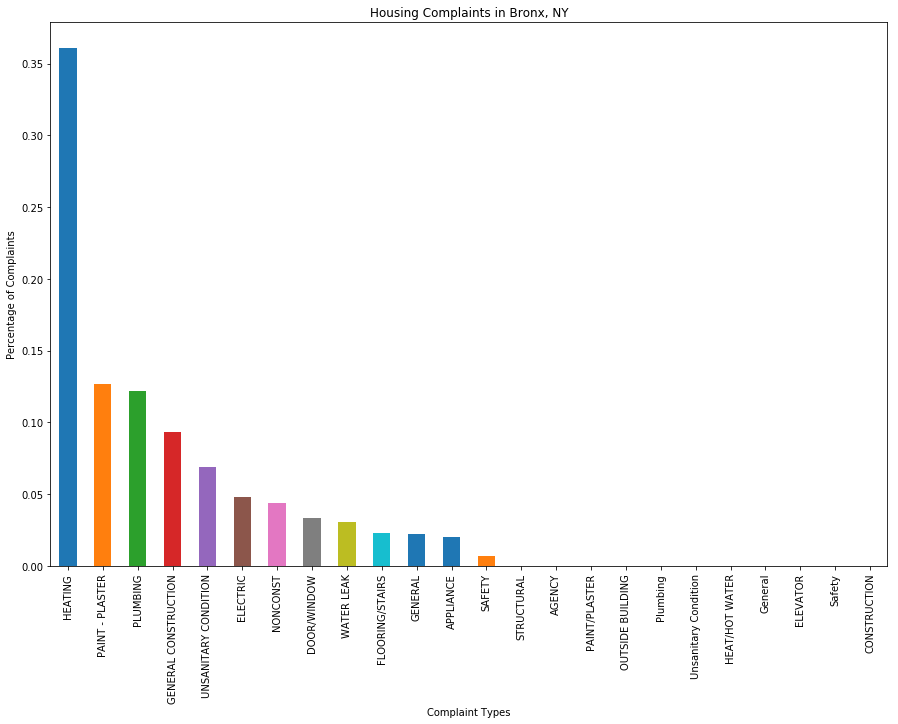

In [101]:
#All Complaint types as a perentage of the total
import matplotlib.pyplot as plt
%matplotlib inline

merged_df['Complaint Type'].value_counts(normalize=True).plot(kind='bar', figsize=(15, 10))
plt.xlabel('Complaint Types')
plt.ylabel('Percentage of Complaints')
plt.title('Housing Complaints in Bronx, NY')
plt.show()

In [102]:
assoc_df = merged_df[['Complaint Type', 'lotarea', 'bldgarea', 'resarea', 'numbldgs', 'numfloors', 'lotdepth',
       'bldgdepth', 'yearbuilt', 'builtfar', 'residfar', 'facilfar', 'lottype', 'zipcode', 'bldgclass']]

The code for the following associations function can be found at https://github.com/shakedzy/dython. There is also a link https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9 to a blog post describing the use of the function. This function allows computation of association of variables regardles of whether those variables are numeric or categorical. The functions uses these three statistical methods - Pearsonr, Cramer's V, and Theil's U - for numeric to numeric, Cramer's V for numeric to categorical, and Theil's U to account for assymetric associations. 

In [103]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
from collections import Counter
from dython._private import convert, remove_incomplete_samples, replace_nan_with_value
from dython.nominal import associations

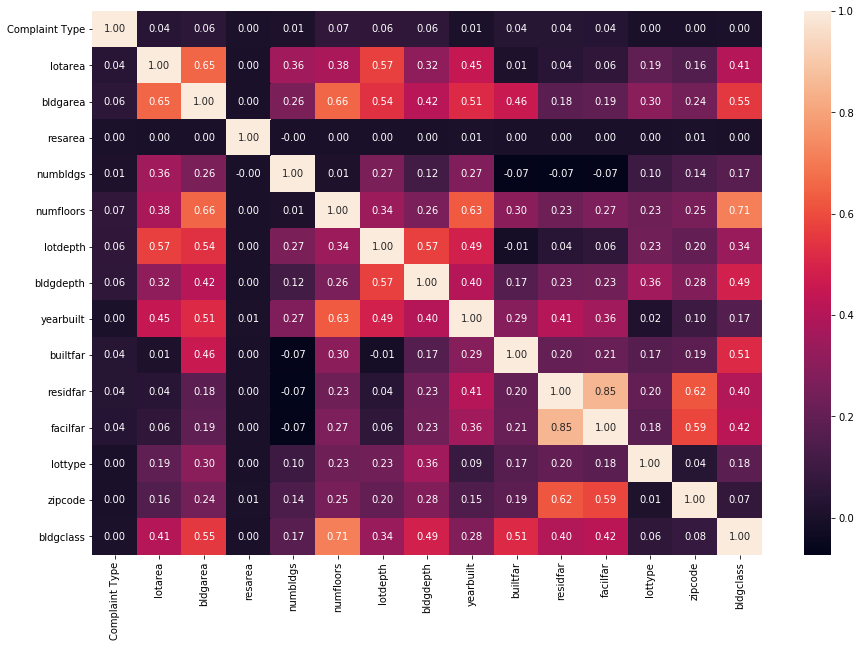

In [104]:
associations(assoc_df, nominal_columns=['Complaint Type', 'yearbuilt', 'lottype', 'zipcode', 'bldgclass'], 
             theil_u=True, plot=True, nan_strategy='drop', figsize=(15, 10))

In [105]:
#Lottype, zipcode, and bldgclass had no association with complaint type, so they were eliminated for a second run of the matrix. Resarea appears to have no association with
#any other variables.
assoc_df2 = merged_df[['Complaint Type', 'lotarea', 'bldgarea', 'numbldgs', 'numfloors', 'lotdepth',
       'bldgdepth', 'yearbuilt', 'builtfar', 'residfar', 'facilfar']]

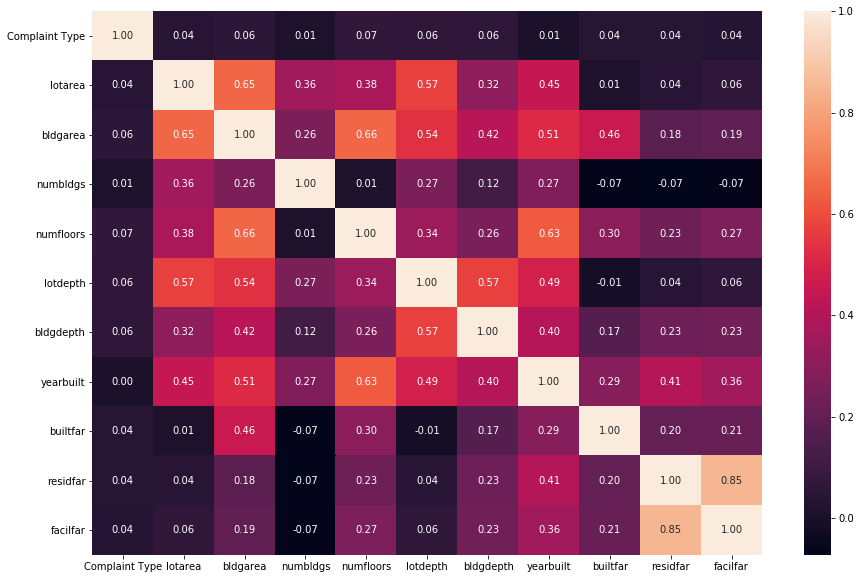

In [106]:
associations(assoc_df2, nominal_columns=['Complaint Type', 'yearbuilt'], theil_u=True, plot=True, nan_strategy='drop', figsize=(15, 10))

In [107]:
#These two lines transformed the dataset into a binary classification set
assoc_df2['Complaint Type'] = assoc_df2['Complaint Type'].where((assoc_df2['Complaint Type']=='HEATING'), 1)
assoc_df2['Complaint Type'] = assoc_df2['Complaint Type'].where((assoc_df2['Complaint Type']!='HEATING'), 0)

/Users/sarasharick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sarasharick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [108]:
assoc_df2['Complaint Type'].value_counts()

1    948912
0    535105
Name: Complaint Type, dtype: int64

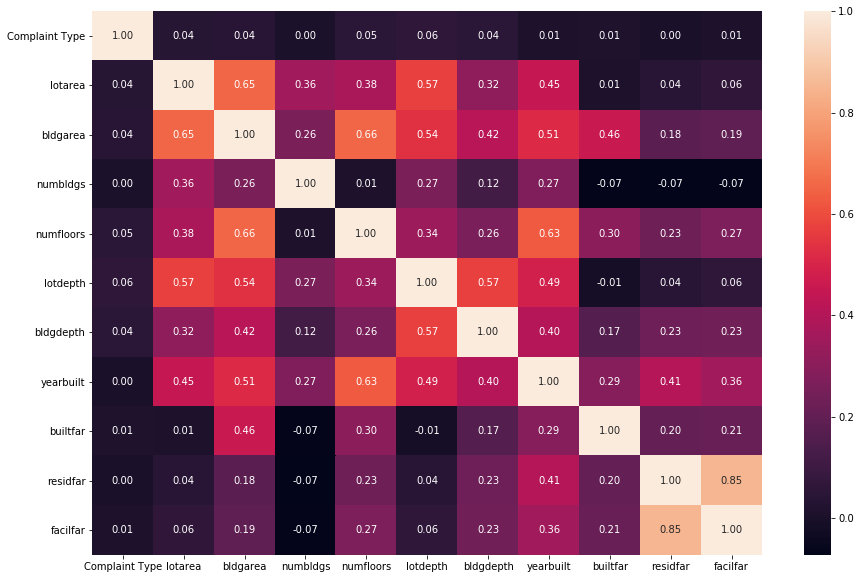

In [109]:
#The associations matrix was run a third time to see if the binary change made a difference. 
#The associations of all features with Complaint Type was still very low
associations(assoc_df2, nominal_columns=['Complaint Type', 'yearbuilt'], 
             theil_u=True, plot=True, nan_strategy='drop', figsize=(15, 10))

In [110]:
#This is the final dataset used in the classification analysis
final_df2_binary = assoc_df2.to_csv('desktop/edx IBM/final_df2_binary.csv')

CONCLUDING REMARKS: This notebook contains the cleaning necessary to have a dataframe ready for analysis. See the comments on individual code blocks for the reasoning on each cleaning step. The question for this section asks about associations between variables. Because of the mixture of categorical and numerical variables in the dataset, I used an open source associations function (citation in code block) that incorporated several different statistical measures (Pearsonr, Cramer's V, and Theil's U) to calcluate the associations and produce a heatmap. In general, all variables have a low association with Complaint Type. 